# Using NiLearn for Image Manipulation and Visualization

### First, let's set up our packages

In [19]:
from nilearn import plotting
import pylab as plt
%matplotlib inline 

import numpy as np

#### We're going to load the anatomical (T1) and functional (bold) runs from Subject 1

In [20]:
from nilearn import image as niLi

t1 = niLi.load_img("F://openNeuro//data//data//sub-01//anat//sub-01_T1w.nii.gz")
bold = niLi.load_img("F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz")

#NiLearn leverages NiBabel functions to perform these processes

#### We can cut out some of the first volumes to make sure we're using data from a steady state.
This will cut out the first 5 volumes from the functional images:

In [15]:
bold = bold.slicer[..., 5:]

## Image Manipulation with NiLearn

#### Let's create a mean image
This is a four dimensional matrix, and this is a shorthand way of taking a mean of each voxel over time. So now we have access to the mean bold image.


In [21]:
mean_func_image = niLi.mean_img(bold)


Now we can use an interactive plot to look at our image!


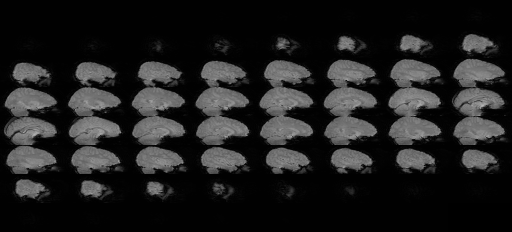
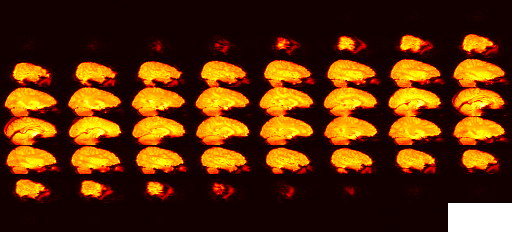

In [27]:
plotting.view_img(mean_func_image, bg_img=mean_func_image)

### Resampling an image to a template
We can sample one image to have the same dimensions as another. For example, let's resample an anatomical T1 image to the computed mean image above.

Resampling isn't changing the position of an image; instead we're changing the voxel sizes, or reslicing.
For example, if we have 100 voxels in the y plane, and we only want to work with 50 voxels, we can interpolate the data to take the average of two voxels to condense the plane by half 

In [28]:
mean = niLi.mean_img(bold)
print([mean.shape, t1.shape])

[(64, 64, 29), (224, 256, 256)]


We saw the shape of the respective images above, now let's resample our anatomical (T1) image to the mean functional image 

In [29]:
resampled_t1 = niLi.resample_to_img(t1, mean) #the first argument is the image we want to resample
#the second argument is what we want to resample to
resampled_t1.shape

(64, 64, 29)

So we can see that the shapes are now the same!

But what does it look like?

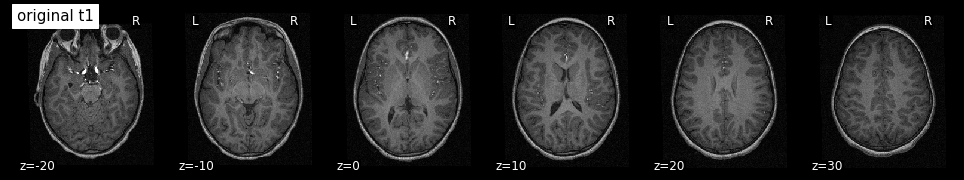

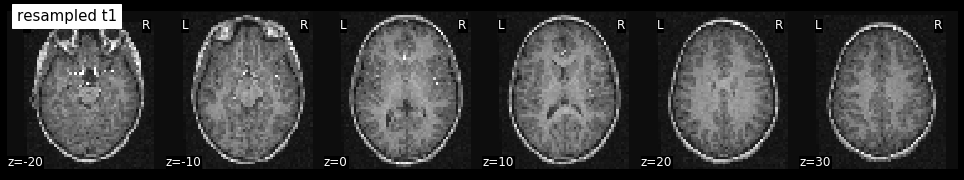

In [30]:
plotting.plot_anat(t1, title='original t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])
plotting.plot_anat(resampled_t1, title='resampled t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])

Data manipulation like this could be useful if we want to directly compare regions between the anatomical and functional image. For example, if we want to look at the hippocampus, we could overlay the T1 on top of the functional image to see what the average activation of the bold signal

## Smooth an image
### We can use NiLearn to quickly smooth an MRI image. For example, let's take the mean image we created above, and smooth it with different FWHM value

Smoothing is commonly done to increase the signal to noise ratio in data, in order to condense a signal to an area, or reduce noise

Spatial smoothing means that data points are averaged with their neighbours. This has the effect of a low pass filter meaning that high frequencies of the signal are removed from the data while enhancing low frequencies. The result is that sharp "edges" of the images are blurred and spatial correlation within the data is more pronounced. 

The standard procedure of spatial smoothing is employed by convolving the fMRI signal with a Gaussian function of a specific width. This Gaussian kernel is a kernel with the shape of a normal distribution curve. The size of the Gaussian kernel defines the "width" of the curve which determines in turn how much the data is smoothed. The width is not expressed in terms of the standard deviation σ, as customary in statistics, but with the Full Width at Half Maximum (FWHM)

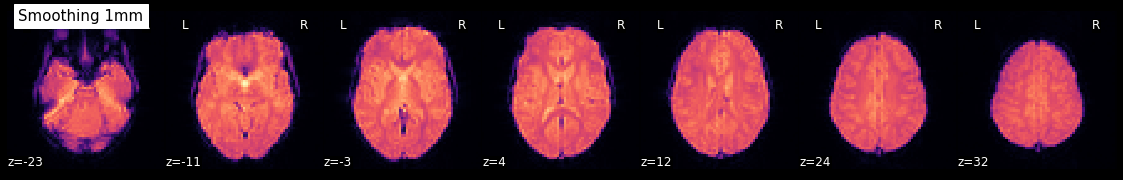

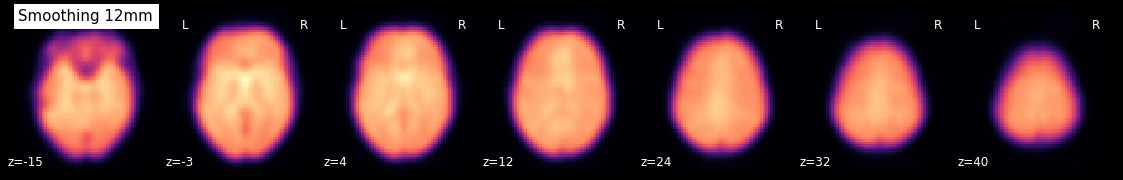

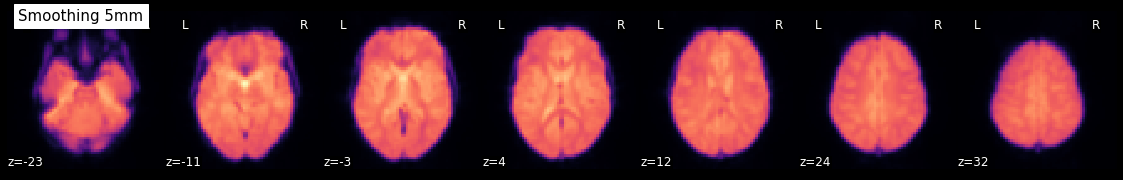

In [32]:
for fwhm in (1, 12, 5):
    smoothed_img = niLi.smooth_img(mean, fwhm)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % fwhm,
                     display_mode='z', cmap='magma')

## Clean an image to improve SNR
Sometimes you also want to clean your functional images a bit to improve the SNR (signal to noise ratio). For this, nilearn offers clean_img. You can improve the SNR of your fMRI signal by using one or more of the following options:

- detrend
- standardize
- remove confounds
- low and high pass filter

First let's get the TR (time of repetition; time between volumes) of our image:

In [33]:
TR = bold.header['pixdim'][4] #look at the header of our bold image, call the pixel dimensions
TR


1.5

Now we know that there were 1.5 seconds between each volume

Now, let's detrend the image

In [35]:
func_d = niLi.clean_img(bold, detrend=True, standardize=False, t_r=TR)
# creating a detrended image by using our functional image (bold), and the time of repetition we found before (TR)

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


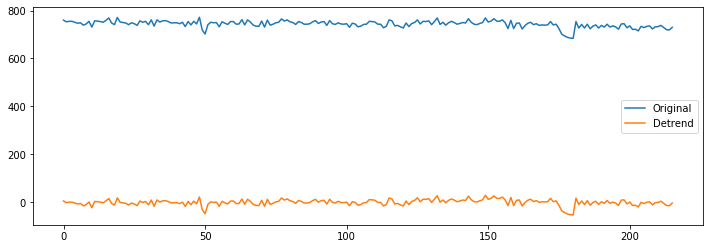

In [37]:
# Plot the original and detrended timecourse of a random voxel
x, y, z = [28, 52, 17]
plt.figure(figsize=(12, 4))
plt.plot(np.transpose(bold.get_data()[x, y, z, :]))
plt.plot(np.transpose(func_d.get_data()[x, y, z, :]))
plt.legend(['Original', 'Detrend']);

This does a low-pass filter and de-means the data

The blue line shows the original activation at that voxel we chose, the orange detrended line shows the difference in activation from the trend

Now let's use the `standardize` function

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


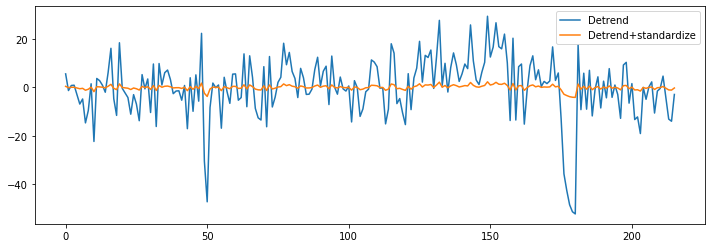

In [39]:
func_ds = niLi.clean_img(bold, detrend=True, standardize=True, t_r=TR)

plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_d.get_data()[x, y, z, :]))
plt.plot(np.transpose(func_ds.get_data()[x, y, z, :]))
plt.legend(['Detrend', 'Detrend+standardize']);

This normalizes the variance relative to the detrended data

## Mask an image and extract an average signal of a region
Thanks to nibabel and nilearn you can consider your images just a special kind of a numpy array. Which means that you have all the liberties that you are used to.

For example, let's take a functional image, (1) create the mean image thereof, then we (2) threshold it to only keep the voxels that have a value that is higher than 95% of all voxels. Of this thresholded image, we only (3) keep those regions that are bigger than 1000mm^3. And finally, we (4) binarize those regions to create a mask image.

So first, we load again a functional image and compute the mean thereof.

In [42]:
mean = niLi.mean_img(bold)


Use `threshold_img` to only keep voxels that have a value that is higher than 95% of all voxels.



In [43]:
thr = niLi.threshold_img(mean, threshold='95%')



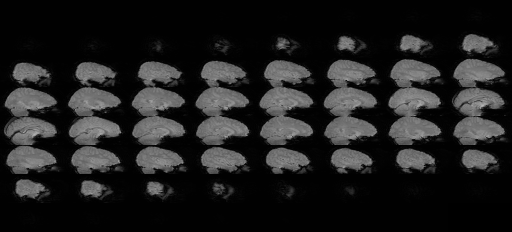
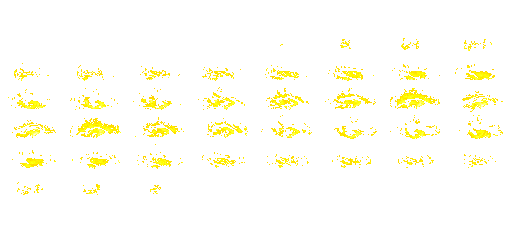

In [45]:
plotting.view_img(thr, bg_img=mean_func_image)

Now, let's only keep those voxels that are in regions/clusters that are bigger than 1000mm^3.

In [48]:
voxel_size = np.prod(thr.header['pixdim'][1:4])  # Size of 1 voxel in mm^3
voxel_size

39.0625

Let's create a mask that only contains these big clusters

In [50]:
from nilearn.regions import connected_regions
cluster = connected_regions(thr, min_region_size=1000. / voxel_size, smoothing_fwhm=1)[0]

And finally, let's binarize this cluster file to create a mask!

In [53]:
mask = niLi.math_img('np.mean(img,axis=3) > 0', img=cluster)

Now let's visualize the mask on the subject specific anatomy:



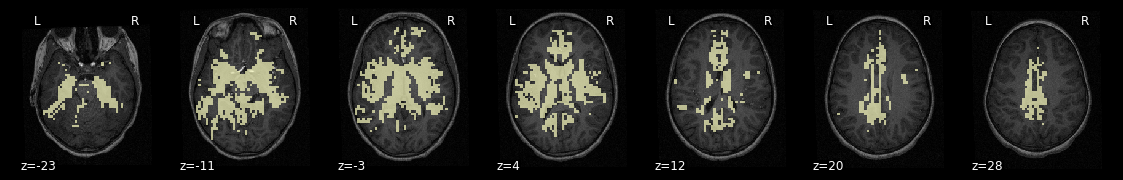

In [54]:
from nilearn.plotting import plot_roi
plotting.plot_roi(mask, bg_img=t1, display_mode='z', dim=-.5, cmap='magma_r');

Next step is now to take this mask, apply it to the original functional image and extract the mean of the temporal signal.



In [55]:
from nilearn.masking import apply_mask

all_timecourses = apply_mask(bold, mask)
all_timecourses.shape

(216, 5144)

Note: You can bring the timecourses (or masked data) back into the original 3D/4D space with unmask:

In [56]:
from nilearn.masking import unmask
img_timecourse = unmask(all_timecourses, mask)

Compute mean trace of all extracted timecourses and plot the mean signal.



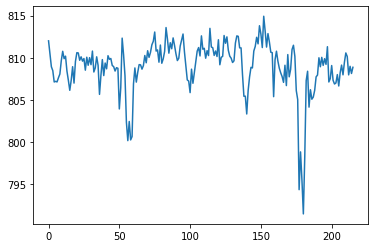

In [57]:
mean_timecourse = all_timecourses.mean(axis=1)
plt.plot(mean_timecourse)

## Independent Component Analysis
Nilearn gives you also the possibility to run an ICA on your data. This can either be on a single file or on multiple subjects.

In [58]:
# Import CanICA module
from nilearn.decomposition import CanICA

# Specify relevant parameters
n_components = 5
fwhm = 6.

In [59]:
# Specify CanICA object
canica = CanICA(n_components=n_components, smoothing_fwhm=fwhm,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0, n_jobs=-1,
                standardize=True)

In [60]:
# Run/fit CanICA on input data
canica.fit(bold)

[MultiNiftiMasker.fit] Loading data from [Nifti1Image('F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz')]
[MultiNiftiMasker.fit] Computing mask


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.4s finished


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.007205, ...,  0.004173],
       ...,
       [ 0.000441, ..., -0.010241]], dtype=float32), n_components=5, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.0s, 0.0min


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


CanICA(detrend=True, do_cca=True, high_pass=None, low_pass=None, mask=None,
       mask_args=None, mask_strategy='epi',
       memory=Memory(location=nilearn_cache\joblib), memory_level=2,
       n_components=5, n_init=10, n_jobs=-1, random_state=0, smoothing_fwhm=6.0,
       standardize=True, t_r=None, target_affine=None, target_shape=None,
       threshold=3.0, verbose=10)

In [63]:
# Retrieve the independent components in brain space
components_img = canica.masker_.inverse_transform(canica.components_)

Let's now visualize those components on the T1 image.

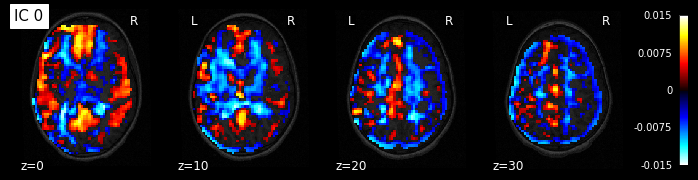

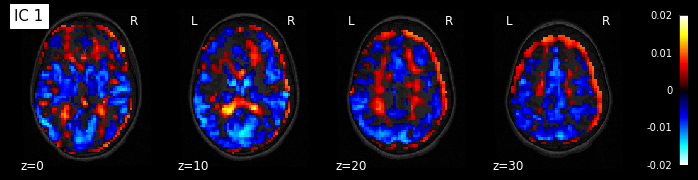

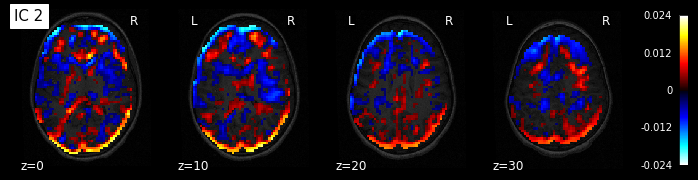

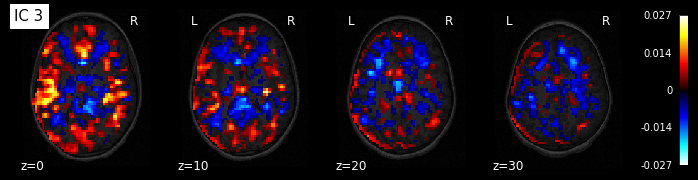

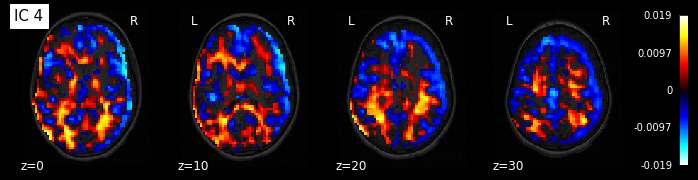

In [62]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=[0, 10, 20, 30], colorbar=True, bg_img=t1)

The ICA components are not ordered, the visualization above and below therefore might look different from case to case.

If you're now also curious about how those independent components, correlate with the functional image over time, you can use the following code to get some insights:

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


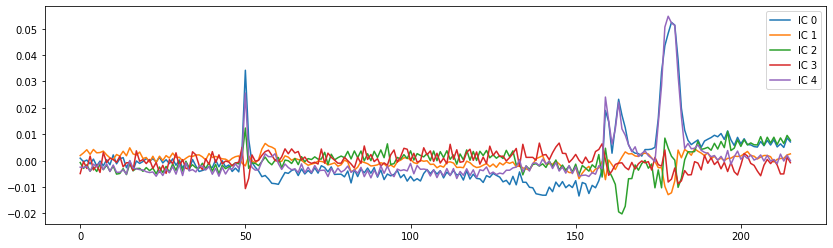

In [64]:

from scipy.stats.stats import pearsonr

# Get data of the functional image
orig_data = bold.get_data()

# Compute the pearson correlation between the components and the signal
curves = np.array([[pearsonr(components_img.get_data()[..., j].ravel(),
      orig_data[..., i].ravel())[0] for i in range(orig_data.shape[-1])]
        for j in range(canica.n_components)])

# Plot the components
fig = plt.figure(figsize=(14, 4))
centered_curves = curves - curves.mean(axis=1)[..., None]
plt.plot(centered_curves.T)
plt.legend(['IC %d' % i for i in range(canica.n_components)])

## Dictionary Learning
Recent work has shown that dictionary learning based techniques outperform ICA in term of stability and constitutes a better first step in a statistical analysis pipeline. Dictionary learning in neuro-imaging seeks to extract a few representative temporal elements along with their sparse spatial loadings, which constitute good extracted maps. Luckily, doing dictionary learning with nilearn is as easy as it can be.

DictLearning is a ready-to-use class with the same interface as CanICA. The sparsity of output map is controlled by a parameter alpha: using a larger alpha yields sparser maps.

In [65]:
# Import DictLearning module
from nilearn.decomposition import DictLearning

In [66]:
# Specify the dictionary learning object
dict_learning = DictLearning(n_components=n_components, n_epochs=1,
                             alpha=1., smoothing_fwhm=fwhm, standardize=True,
                             memory="nilearn_cache", memory_level=2,
                             verbose=1, random_state=0, n_jobs=-1)

In [67]:
# As before, let's fit the model to the data
dict_learning.fit(bold)

[MultiNiftiMasker.fit] Loading data from [Nifti1Image('F://openNeuro//data//data//sub-01//func//sub-01_task-antisaccadetaskwithfixedorder_run-01_bold.nii.gz')]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[DictLearning] Learning initial components


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


[DictLearning] Computing initial loadings
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.005127, ...,  0.010573],
       ...,
       [ 0.000369, ..., -0.0053  ]], dtype=float32), 
array([[10.092753, ...,  0.618399],
       ...,
       [ 1.590542, ..., -3.903258]], dtype=float32))
_________________________________________________compute_loadings - 0.0s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.dict_learning.dict_learning_online...
dict_learning_online(array([[10.092753, ...,  1.590542],
       ...,
       [ 0.618399, ..., -3.903258]], dtype=float32), 
5, alpha=1.0, n_iter=1472, batch_size=20, method='cd', dict_init=array([[ 2.944641e-02,  7.833907e-02, -1.762572e-01, -8.677703e-01,
        -4.622144e-01],
       [-2.352455e-01, -6.42

DictLearning(alpha=1.0, batch_size=20, detrend=True, dict_init=None,
             high_pass=None, low_pass=None, mask=None, mask_args=None,
             mask_strategy='epi', memory=Memory(location=nilearn_cache\joblib),
             memory_level=2, method='cd', n_components=5, n_epochs=1, n_jobs=-1,
             random_state=0, reduction_ratio='auto', smoothing_fwhm=6.0,
             standardize=True, t_r=None, target_affine=None, target_shape=None,
             verbose=1)

In [68]:
# Retrieve the independent components in brain space
components_img = dict_learning.masker_.inverse_transform(dict_learning.components_)

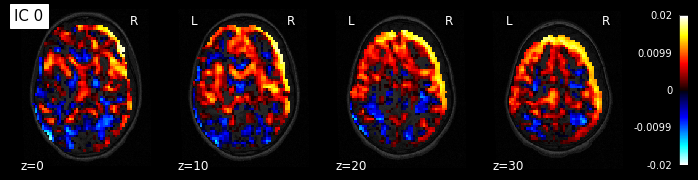

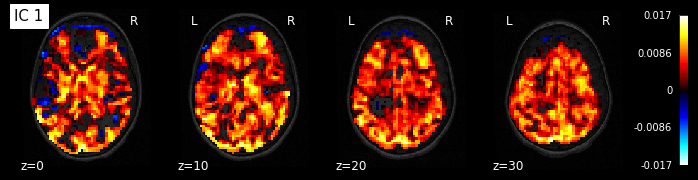

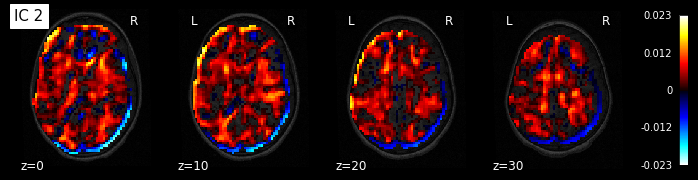

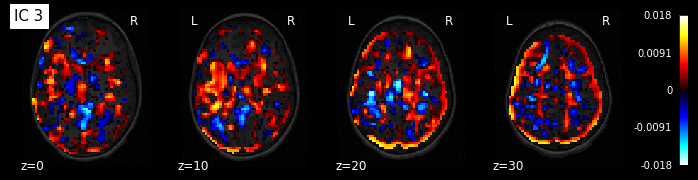

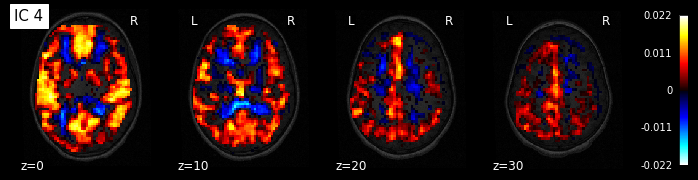

In [69]:
# Now let's plot the components
for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=[0, 10, 20, 30], colorbar=True, bg_img=t1)

Maps obtained with dictionary leaning are often easier to exploit as they are less noisy than ICA maps, with blobs usually better defined. Typically, smoothing can be lower than when doing ICA. While dictionary learning computation time is comparable to CanICA, obtained atlases have been shown to outperform ICA in a variety of classification tasks.

C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
C:\Users\joann\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


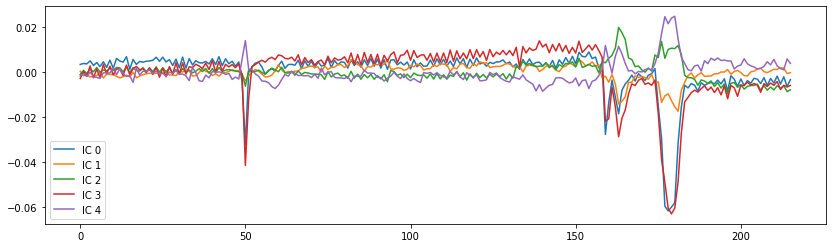

In [70]:
from scipy.stats.stats import pearsonr

# Get data of the functional image
orig_data = bold.get_data()

# Compute the pearson correlation between the components and the signal
curves = np.array([[pearsonr(components_img.get_data()[..., j].ravel(),
      orig_data[..., i].ravel())[0] for i in range(orig_data.shape[-1])]
        for j in range(dict_learning.n_components)])

# Plot the components
fig = plt.figure(figsize=(14, 4))
centered_curves = curves - curves.mean(axis=1)[..., None]
plt.plot(centered_curves.T)
plt.legend(['IC %d' % i for i in range(dict_learning.n_components)])

## 2. Image visualization with nilearn
Above, we've already seen some ways on how to visualize brain images with nilearn. And there are many more. To keep this notebook short, we will only take a look at some of them. For a complete list, see nilearn's plotting section.

Note: In most of the nilearn's plotting functions, you can specify the value output_file=example.png', to save the figure directly to a file.

### Glass brain
A really cool way to visualize your brain images on the MNI brain is nilearn's plot_glass_brain() function. It gives you a good overview of all significant voxels in our image.

Note: It's important that your data is normalized to the MNI-template, as the overlay is otherwise not overlapping.

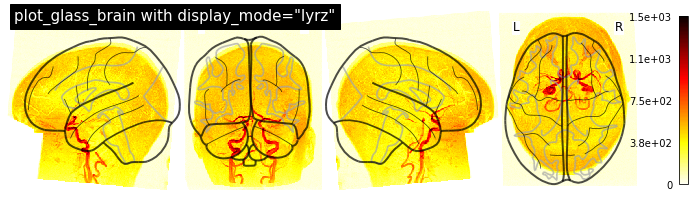

In [74]:
plotting.plot_glass_brain(t1, threshold=3, colorbar=True,
                          title='plot_glass_brain with display_mode="lyrz"',
                          plot_abs=False, display_mode='lyrz')


## Overlay functional image onto anatomical image
In this type of visualization, you can specify the axis through which you want to cut and the cut coordinates. cut_coords as integer 5 without a list implies that number of cuts in the slices should be maximum of 5. The coordinates to cut the slices are selected automatically. But you could also specify the exact cuts withcut_coords=[-10, 0, 10, 20].